# MBA em Ciência de Dados

## Estatística para Ciência de Dados


Material Produzido por Mariana Cúri
Cemeai - ICMC/USP São Carlos

In [81]:
#Carregando uma base de dados para exemplo

import pandas as pd

enem = pd.read_csv(".\data\ENEM.csv", sep = ',', na_values = '-', encoding= 'unicode_escape') #importa os dados
print('Linhas:',enem.shape[0],' e  Colunas:',enem.shape[1]) #número de linhas e número de colunas

Linhas: 2901  e  Colunas: 14


In [20]:
#Análise descritiva dos dados

enem.describe()

,Ordem,N_alunos,N_participantes,P_Participantes,Nivel_Docente,Media_30melhores,Media
count,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,1596.000000,2901.000000
mean,1451.000000,71.487418,50.116856,74.692344,60.031437,570.831635,527.602899
std,837.590891,74.486501,49.998143,15.185307,12.964371,43.365687,38.058296
min,1.000000,10.000000,5.000000,50.000000,7.100000,445.540000,415.670000
25%,726.000000,24.000000,19.000000,60.240000,51.400000,541.680000,498.270000
50%,1451.000000,45.000000,33.000000,76.190000,60.300000,570.650000,528.340000
75%,2176.000000,92.000000,64.000000,88.240000,69.000000,598.187500,555.700000
max,2901.000000,761.000000,526.000000,100.000000,100.000000,719.280000,658.290000


(array([  1.,   5.,  44., 210., 482., 582., 344., 115.,  28.,   5.]),
 array([419.76 , 443.613, 467.466, 491.319, 515.172, 539.025, 562.878,
        586.731, 610.584, 634.437, 658.29 ]),
 <a list of 10 Patch objects>)

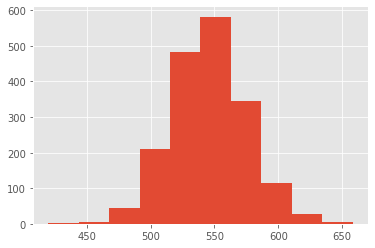

In [21]:
#Montando um histograma

import matplotlib.pyplot as plt

#Pegando media das escolas privadas para montar histograma de exemplo
media_privada = enem.loc[enem.Admin=='Privada', "Media"]

plt.style.use('ggplot') #aplicando um estilo bonito para o histograma
plt.hist(media_privada, bins = 10) #bins são os intervalos do histograma

#### Probabilidade: Definição 1
$$
P(\text{A}) = {número\,\, de\,\, elementos\,\, em\,\, A \over número\,\, de\,\, elementos\,\, em\,\,   \Omega}
$$

In [12]:
#probabilidade: definição 1

def prob(a,n): #a = numero de elementos de um evento A, n = numero total de elementos (ômega)
    return a/n

#exemplo
print('Ômega = {acertar,errar} -> n = 2')
print('A = {acertar} -> a = 1')
prob(1,2)

Ômega = {acertar,errar} -> n = 2
A = {acertar} -> a = 1


0.5

#### Probabilidade de Eventos Independentes
$$
P(\text{A}_1 \cap \text{A}_2) = P(\text{A}_1) . P(\text{A}_2)
$$

In [10]:
#probabilidade: eventos independentes

def probIntersec(listProb): #listProb = uma lista com as probabilidades que desejamos fazer intersecção
    P = 1
    for i in listProb:
        P = i * P
    return P

#exemplo
p = [prob(1,2),prob(2,5),prob(10,30),prob(2,3)] #lista com as probabilidades
print('Lista de probabilidades:',p)
probIntersec(p)

Lista de probabilidades: [0.5, 0.4, 0.3333333333333333, 0.6666666666666666]


0.04444444444444444

#### Probabilidade Condicional
$$
P(\text{A}_2 | \text{A}_1) = {P(\text{A}_2 \cap \text{A}_1) \over P(\text{A}_1)}
$$

In [17]:
#probabilidade condicional

def probCond(Pa1, Pa2): #probabilidade do evento A1 e do evento A2
    return probIntersec([Pa1,Pa2])/Pa1

#exemplo
print('Probabilidade dos eventos A1 e A2 respectivamente:',prob(1,2),'e',prob(2,5))
probCond(prob(1,2),prob(2,5))

Probabilidade dos eventos A1 e A2 respectivamente: 0.5 e 0.4


0.4

#### Probabilidade Total
$$
P(\text{A}) = {P(\text{B}_1) . P(\text{A} | \text{B}_1)} + {P(\text{B}_2) . P(\text{A} | \text{B}_2)} + ... + {P(\text{B}_k) . P(\text{A} | \text{B}_k)}
$$

In [78]:
#probabilidade total

def probTot(listProbB, listProbAB): #listProbB = lista com as probabilidades de B, listProbAB = lista com as probabilidades condicionais A|B
    P = 0
    if(len(listProbB) == len(listProbAB)):
        for i in range(len(listProbB)):
            P = (listProbB[i] * listProbAB[i]) + P
    else:
        print('Erro: As listas devem conter o mesmo tamanho.')
    return P

#exemplo
B = [prob(1,2),prob(2,5),prob(2,3),prob(2,3),prob(2,8)]
AB= [prob(1,2),prob(1,2),prob(2,6),prob(1,8),prob(1,12)]

print('Lista de probabilidades de B:',B)
print('Lista de probabilidades condicionais de A dado B:',AB)
probTot(B,AB)

Lista de probabilidades de B: [0.5, 0.4, 0.6666666666666666, 0.6666666666666666, 0.25]
Lista de probabilidades condicionais de A dado B: [0.5, 0.5, 0.3333333333333333, 0.125, 0.08333333333333333]


0.776388888888889

#### Bayes
$$
{P(\text{B}_i | \text{A})} = {{P(\text{A} | \text{B}_i) . P(\text{B}_i)} \over \sum_{i=1}^K{P(\text{A} | \text{B}_i) . P(\text{B}_i)}}
$$
